In [1]:
"""
Notebook for the capacity to win:
3 Matrices : 
Matrice marché:
    Marché \ Size  \ CAGR 2021-2018 \ FI \ PI

    Size = somme de tout
    FI = Fragmentation index = produit(5 plus gros market share)
    PI = Promotion intensity = Sales in volume with promo / Total sales in volume 

Matrice Marque:
    Brand \ CAGR \ INO \ Prod \ AW 

    Brand : brand bel only
    INO = rate moyen ou median ou un truc représentatif
    Prod = ratio sale out / sale in (sale in dans fichier A&P)
    AW = awareness = un truc random

Matrice Market Brand
    Market \ Brand \ CORR \ Price \ Expertise

    CORR = correlation sales de la marque x Sales du market. Pearson
    Price = prix moyen de la marque sur le marché
    Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random

Le but : Matrice de capacity to win
On scale tout MIN-MAX pour avoir un score sur 100
"""

'\nNotebook for the capacity to win:\n3 Matrices : \nMatrice marché:\n    Marché \\ Size  \\ CAGR 2021-2018 \\ FI \\ PI\n\n    Size = somme de tout\n    FI = Fragmentation index = produit(5 plus gros market share)\n    PI = Promotion intensity = Sales in volume with promo / Total sales in volume \n\nMatrice Marque:\n    Brand \\ CAGR \\ INO \\ Prod \\ AW \n\n    Brand : brand bel only\n    INO = rate moyen ou median ou un truc représentatif\n    Prod = ratio sale out / sale in (sale in dans fichier A&P)\n    AW = awareness = un truc random\n\nMatrice Market Brand\n    Market \\ Brand \\ CORR \\ Price \\ Expertise\n\n    CORR = correlation sales de la marque x Sales du market. Pearson\n    Price = prix moyen de la marque sur le marché\n    Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random\n\nLe but : Matrice de capacity to win\nOn scale tout MIN-MAX pour avoir un score sur 100\n'

In [2]:
import pandas as pd
import numpy as np

from datamanager.DM_USA import DM_USA
from sklearn.preprocessing import MinMaxScaler

# MARKET MATRIX

In [3]:
"""Marché \ Size  \ CAGR 2021-2018 \ FI \ PI

Size = somme de tout
FI = Fragmentation index = produit(5 plus gros market share)
PI = Promotion intensity = Sales in volume with promo / Total sales in volume """

'Marché \\ Size  \\ CAGR 2021-2018 \\ FI \\ PI\n\nSize = somme de tout\nFI = Fragmentation index = produit(5 plus gros market share)\nPI = Promotion intensity = Sales in volume with promo / Total sales in volume '

In [4]:
code_aandp = ["000BQ - BOURSIN", "000LA - THE LAUGHING COW", "000MB - MINI BABYBEL", "000KC - KAUKAUNA", "000PG - PRICE'S", "000MI - MERKTS", "003NH - NURISHH"]
bel_brands = ["BABYBEL", "THE LAUGHING COW", "BOURSIN", "KAUKAUNA", "MERKTS", "PRICES", "NURISHH"]
data_manager = DM_USA(bel_brands, code_aandp)

page 1/14
page 2/14
page 3/14
page 4/14
page 5/14
page 6/14
page 7/14
page 8/14
page 9/14
page 10/14
page 11/14
page 12/14
page 13/14
page 14/14
columns and types are correct


In [5]:
def compute_size(df):
    return df.groupby('Category', as_index=False)['Sales in volume'].sum().rename(columns={'Sales in volume':'Size'})

In [6]:
def cagr(group):
    s = group.reset_index().sort_values(by='Date')
    return s[0].values[-1] - s[0].values[0]

In [7]:
def compute_cagr(df, by:str):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df.Date >=  '2018-01-01']
    df = df.set_index('Date').groupby([by, pd.Grouper(freq="Y")]).agg({'Sales in volume':'sum'})
    df_cagr = pd.DataFrame(df.stack().groupby(by).agg(cagr))
    return df_cagr.reset_index().rename(columns={0:'CAGR'})

In [8]:
def fragmentation_index(series, n):
    size = series.sum()
    return series.reset_index()\
                 .sort_values('Sales in volume', ascending=False)[:n]['Sales in volume']\
                 .apply(lambda x:x/size)\
                 .agg('prod')

In [9]:
def compute_fragmentation_index(df):
    df_FI = df.groupby(['Category', 'Brand'])['Sales in volume']\
              .agg(sum).groupby('Category')\
              .agg(fragmentation_index, 10)
    return pd.DataFrame(df_FI).reset_index().rename(columns={'Sales in volume':'FI'})

In [10]:
def compute_promotion_intensity(df):
    size = df.groupby('Category')['Sales in volume'].sum()
    promo = df.groupby('Category')['Sales volume with promo'].sum()
    df_PI = promo / size
    return pd.DataFrame(df_PI).reset_index().rename(columns={0:'PI'})

In [11]:
df_size = compute_size(data_manager.df)
df_cagr = compute_cagr(data_manager.df, by='Category')
df_FI = compute_fragmentation_index(data_manager.df)
df_PI = compute_promotion_intensity(data_manager.df)

df_category = pd.merge(df_size, df_cagr, on='Category')
df_category = pd.merge(df_category, df_FI, on='Category')
df_category = pd.merge(df_category, df_PI, on='Category')
df_category

,Category,Size,CAGR,FI,PI
0,CLASSIC SPREADS,8.195918e+07,5.355792e+05,3.627655e-13,0.099335
1,CREAM CHEESE BLOCKS,1.078566e+09,2.723642e+07,2.554485e-22,0.168785
2,CREAM CHEESE TUBS,7.127467e+08,3.901124e+07,4.771760e-21,0.056678
3,ENTERTAINING TRAYS,1.681786e+08,1.357482e+07,7.223973e-16,0.148030
4,EVERYDAY BLOCKS,2.749236e+09,6.068293e+06,3.240025e-14,0.161143
5,EVERYDAY SHREDDED & GRATED,5.617695e+09,2.182304e+08,3.179043e-18,0.162197
6,GOURMET,7.917575e+08,4.137372e+07,1.577670e-13,0.138514
7,PIMENTO,1.107216e+08,-3.241504e+05,3.703381e-13,0.057441
8,PLANT BASED,6.104720e+07,9.673045e+06,8.144980e-13,0.081492
9,RICOTTA AND FARMERS,4.235586e+08,6.342103e+06,1.258291e-14,0.134069


# Brand Matrix

In [12]:
"""Brand \ CAGR \ INO \ Prod \ AW

Brand : brand bel only
INO = rate moyen ou median ou un truc représentatif
Prod = ratio sale out / sale in (sale in dans fichier A&P) = somme des sales out / somme de mes sale in /\ R1000 - NET SALES dans finance
AW = awareness = un truc random
TODO : MVC = margin variable cost, mm calcul que pour Inno
"""

'Brand \\ CAGR \\ INO \\ Prod \\ AW\n\nBrand : brand bel only\nINO = rate moyen ou median ou un truc représentatif\nProd = ratio sale out / sale in (sale in dans fichier A&P) = somme des sales out / somme de mes sale in /\\ R1000 - NET SALES dans finance\nAW = awareness = un truc random\nTODO : MVC = margin variable cost, mm calcul que pour Inno\n'

In [13]:
def compute_inno(df, how:str):
    return df[df.Date >= '2020-01-01'].groupby('Brand')['Rate of Innovation'].agg(how)

In [14]:
df_cagr = compute_cagr(data_manager.df_bel, by='Brand')
df_inno = compute_inno(data_manager.df_bel, how='mean')

df_brand = pd.merge(df_cagr, df_inno, on='Brand')
df_brand['Prod'] = 2
df_brand['AW'] = 15
df_brand

,Brand,CAGR,Rate of Innovation,Prod,AW
0,BABYBEL,1.018893e+06,0.096088,2,15
1,BOURSIN,1.137386e+06,0.051673,2,15
2,KAUKAUNA,-2.743428e+05,0.081416,2,15
3,MERKTS,-1.774576e+05,0.397417,2,15
4,NURISHH,0.000000e+00,NaN,2,15
5,PRICES,-3.714655e+05,0.002778,2,15
6,THE LAUGHING COW,5.258855e+05,0.052901,2,15


# Market Brand Matrix

In [15]:
"""Matrice Market Brand
Market \ Brand \ CORR \ Price \ Expertise

CORR = correlation sales de la marque x Sales du market. Pearson
Price = prix moyen de la marque - prix moyen du marché
TODO : Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random
TODO : add dans fill bel_brands : (R1000 - NET SALES, MVC dans finance et A&P) en Dollar, !don't forget to *1000!
"""

"Matrice Market Brand\nMarket \\ Brand \\ CORR \\ Price \\ Expertise\n\nCORR = correlation sales de la marque x Sales du market. Pearson\nPrice = prix moyen de la marque - prix moyen du marché\nTODO : Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random\nTODO : add dans fill bel_brands : (R1000 - NET SALES, MVC dans finance et A&P) en Dollar, !don't forget to *1000!\n"

In [16]:
df_temp = data_manager.df.groupby(['Category', 'Date'])['Sales in volume'].agg('mean').sort_index().reset_index()

Category
CLASSIC SPREADS               AxesSubplot(0.125,0.125;0.775x0.755)
CREAM CHEESE BLOCKS           AxesSubplot(0.125,0.125;0.775x0.755)
CREAM CHEESE TUBS             AxesSubplot(0.125,0.125;0.775x0.755)
ENTERTAINING TRAYS            AxesSubplot(0.125,0.125;0.775x0.755)
EVERYDAY BLOCKS               AxesSubplot(0.125,0.125;0.775x0.755)
EVERYDAY SHREDDED & GRATED    AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET                       AxesSubplot(0.125,0.125;0.775x0.755)
PIMENTO                       AxesSubplot(0.125,0.125;0.775x0.755)
PLANT BASED                   AxesSubplot(0.125,0.125;0.775x0.755)
RICOTTA AND FARMERS           AxesSubplot(0.125,0.125;0.775x0.755)
SINGLE SERVE                  AxesSubplot(0.125,0.125;0.775x0.755)
SLICES                        AxesSubplot(0.125,0.125;0.775x0.755)
SNACK                         AxesSubplot(0.125,0.125;0.775x0.755)
SNACKING COMBOS               AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales in volume, dtype: object

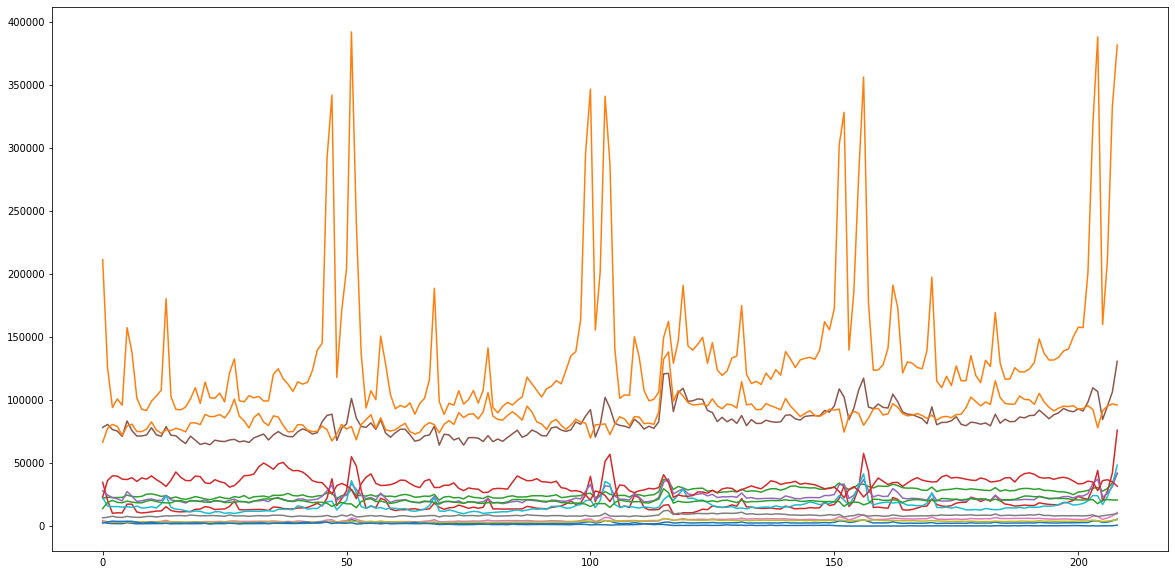

In [17]:
df_temp.groupby('Category')['Sales in volume'].plot(use_index=False, figsize=(20, 10))

Category                    Sub Category           Brand           
CLASSIC SPREADS             CLASSIC SPREADS        KAUKAUNA            AxesSubplot(0.125,0.125;0.775x0.755)
                                                   MERKTS              AxesSubplot(0.125,0.125;0.775x0.755)
                                                   THE LAUGHING COW    AxesSubplot(0.125,0.125;0.775x0.755)
EVERYDAY SHREDDED & GRATED  EVERYDAY SHREDS        NURISHH             AxesSubplot(0.125,0.125;0.775x0.755)
GOURMET                     GOURMET SPREADS        BOURSIN             AxesSubplot(0.125,0.125;0.775x0.755)
                                                   KAUKAUNA            AxesSubplot(0.125,0.125;0.775x0.755)
PIMENTO                     PIMENTO                PRICES              AxesSubplot(0.125,0.125;0.775x0.755)
PLANT BASED                 PLANT BASED            BOURSIN             AxesSubplot(0.125,0.125;0.775x0.755)
                                                   NURISHH          

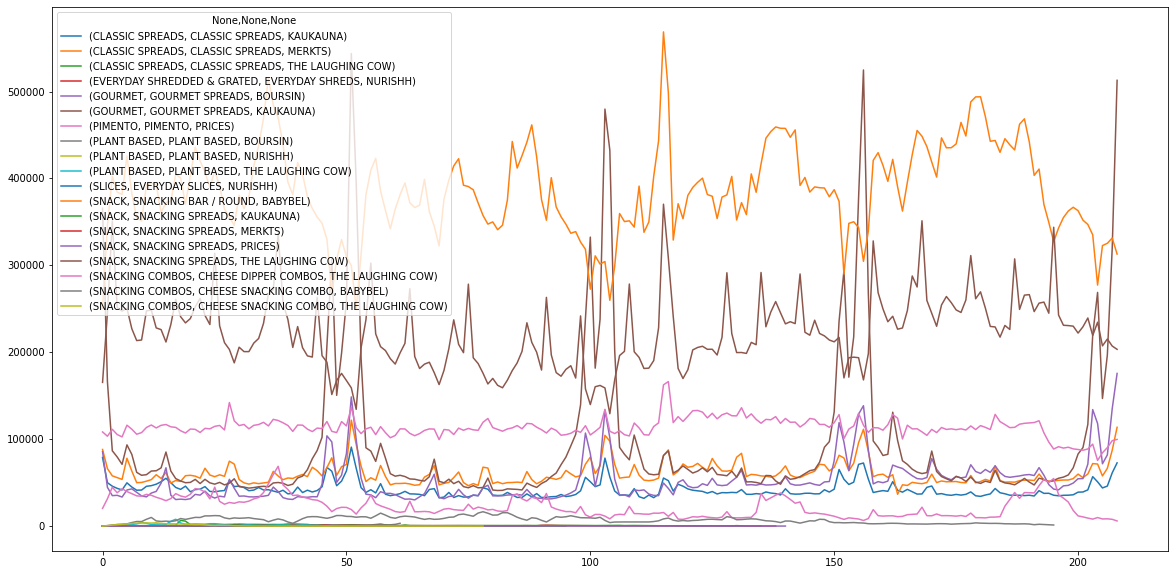

In [18]:
data_manager.df_bel.groupby(['Category', 'Sub Category', 'Brand'])['Sales in volume'].plot(use_index=False, figsize=(20, 10), legend=True)

In [19]:
def compute_corr_table(df, df_bel, method:str):
    brand_table = pd.pivot_table(data=df_bel, values='Sales in volume', index='Date', columns='Brand').reset_index(drop=True)
    category_table = pd.pivot_table(data=df, values='Sales in volume', index='Date', columns='Category').reset_index(drop=True)
    brand_dict = dict()
    for brand in brand_table.columns:
        cat_dict = dict()
        for cat in category_table.columns:
            cat_dict[cat] = brand_table[brand].corr(category_table[cat], method=method)
            #print(f'{brand} on {cat} : {brand_table[brand].corr(category_table[cat], method="kendall")}')
        brand_dict[brand] = cat_dict
    return pd.DataFrame(brand_dict)

In [20]:

def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap="seismic")
    return styler


#df_corr.style.pipe(make_pretty)

In [21]:
def compute_price(df, df_bel):
    #Price = 1 - abs(prix moyen de la marque - prix moyen du marché)/prix moyen du marché
    mean_price_brands = df_bel.groupby('Brand', as_index=False)['Price per volume'].agg('mean').fillna(0.0)
    mean_price_categories = df.groupby('Category', as_index=False)['Price per volume'].agg('mean').fillna(0.0)

    brand_dict = dict()
    for brand in mean_price_brands.Brand.unique():
        cat_dict = dict()
        for cat in mean_price_categories.Category.unique():
            cat_dict[cat] = 1 - (abs(
                (
                    mean_price_brands[mean_price_brands.Brand==brand]['Price per volume'].values - \
                    mean_price_categories[mean_price_categories.Category==cat]['Price per volume'].values
                ))\
                /mean_price_categories[mean_price_categories.Category==cat]['Price per volume'].values)[0]
        brand_dict[brand] = cat_dict
    return pd.DataFrame(brand_dict)

In [22]:
#Expertise = Questionnaire Bel (Match between Brand on Market) = un truc random
def compute_expertise(df, df_bel):
    brands = df_bel.Brand.unique()
    categories = df.Category.unique()
    return pd.DataFrame(np.random.randint(0, 100,size=(len(categories), len(brands))), columns=brands, index=categories)

In [23]:
df_corr = compute_corr_table(data_manager.df, data_manager.df_bel, method='pearson')
df_price = compute_price(data_manager.df, data_manager.df_bel)
df_expertise = compute_expertise(data_manager.df, data_manager.df_bel)
print(df_corr.shape, df_price.shape, df_expertise.shape)


(14, 7) (14, 7) (14, 7)


# SCALE AND WEIGHT

In [24]:
def scale_market_brand(df_corr, df_price, df_expertise):
    corr_scaler = MinMaxScaler(feature_range=(0, 100))
    price_scaler = MinMaxScaler(feature_range=(0, 100))
    expertise_scaler = MinMaxScaler(feature_range=(0, 100))
    
    df_corr[df_corr.columns] = corr_scaler.fit_transform(df_corr[df_corr.columns])
    df_price[df_price.columns] = price_scaler.fit_transform(df_price[df_price.columns])
    df_expertise[df_expertise.columns] = expertise_scaler.fit_transform(df_expertise[df_expertise.columns])
    #display(df_expertise)
    return df_corr + df_price + df_expertise
    

In [25]:
def scale_market(df_category):
    #CAGR	FI	PI
    CAGR_scaler = MinMaxScaler(feature_range=(0, 100))
    FI_scaler = MinMaxScaler(feature_range=(0, 100))
    PI_scaler = MinMaxScaler(feature_range=(0, 100))

    df_category['CAGR'] = CAGR_scaler.fit_transform(df_category[['CAGR']])
    df_category['FI'] = FI_scaler.fit_transform(df_category[['FI']])
    df_category['PI'] = PI_scaler.fit_transform(df_category[['PI']])

    #df_category['sum'] = df_category[['CAGR', 'FI', 'PI']].sum(axis=1)
    return df_category

In [26]:
df_market_brand = scale_market_brand(df_corr.copy(), df_price.copy(), df_expertise.copy())
scale_market(df_category.copy())

,Category,Size,CAGR,FI,PI
0,CLASSIC SPREADS,8.195918e+07,0.521824,9.004467e-07,53.985228
1,CREAM CHEESE BLOCKS,1.078566e+09,12.723088,0.000000e+00,100.000000
2,CREAM CHEESE TUBS,7.127467e+08,18.103729,1.121027e-14,25.722870
3,ENTERTAINING TRAYS,1.681786e+08,6.480259,1.793115e-09,86.248866
4,EVERYDAY BLOCKS,2.749236e+09,3.050063,8.042304e-08,94.937174
5,EVERYDAY SHREDDED & GRATED,5.617695e+09,100.000000,7.890302e-12,95.634863
6,GOURMET,7.917575e+08,19.183292,3.916051e-07,79.943680
7,PIMENTO,1.107216e+08,0.128961,9.192432e-07,26.228166
8,PLANT BASED,6.104720e+07,4.697296,2.021725e-06,42.163768
9,RICOTTA AND FARMERS,4.235586e+08,3.175183,3.123297e-08,76.998828


In [27]:
df_market_brand

,BABYBEL,BOURSIN,KAUKAUNA,MERKTS,NURISHH,PRICES,THE LAUGHING COW
CLASSIC SPREADS,154.490982,242.685613,213.272487,101.522492,171.949418,117.734955,110.081873
CREAM CHEESE BLOCKS,0.113291,104.123711,189.584160,189.843272,174.489796,181.420813,86.161450
CREAM CHEESE TUBS,177.710573,168.903688,191.922438,106.135853,227.151743,146.119440,204.163439
ENTERTAINING TRAYS,166.155086,202.327035,171.243334,99.055052,273.852489,139.969327,87.019932
EVERYDAY BLOCKS,199.059287,216.651959,188.392339,153.100254,210.259852,148.714918,165.366496
EVERYDAY SHREDDED & GRATED,104.858241,226.845372,214.053345,84.358510,228.467356,143.513067,196.706913
GOURMET,155.964789,171.239418,131.077114,74.122694,248.988064,0.000000,33.974014
PIMENTO,115.765966,188.135923,226.301511,153.048182,149.039535,78.741937,120.816973
PLANT BASED,195.055033,161.098290,134.568568,51.662951,222.115181,29.384534,45.765898
RICOTTA AND FARMERS,139.801345,112.012467,158.561689,191.238636,123.365168,206.218540,100.343002
